Training neural networks

Keras contains two methods for training neural networks: model.compile() and model.fit(). Training options like the optimization algorithm and the loss function are set using model.compile(). The compiled model is trained using model.fit(), which also sets the batch size and number of epochs. model.compile() must always be called before model.fit(). A list of parameters for each method is in the following tables.

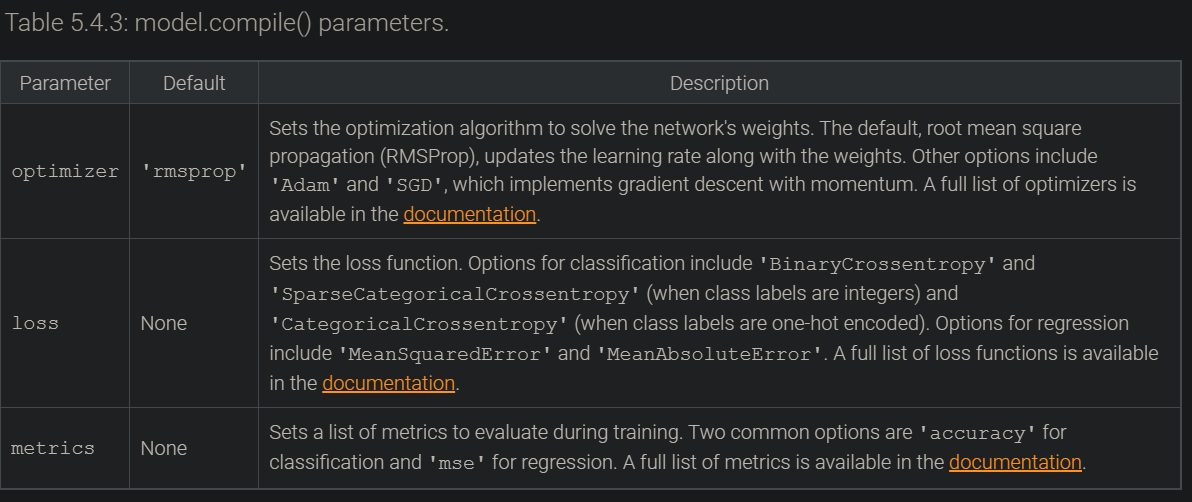

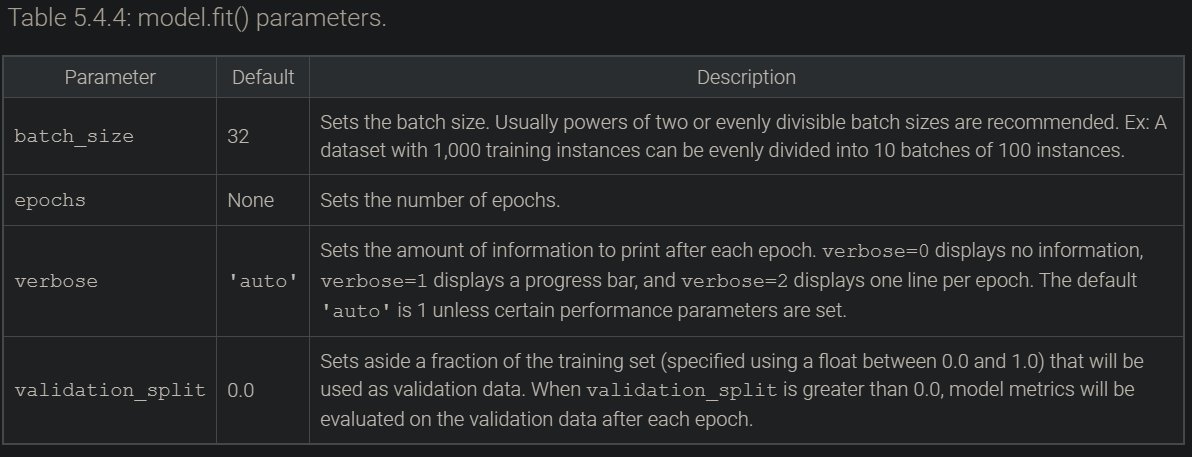

In [1]:
import numpy as np
import pandas as pd
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
# The backend must be set before importing keras, not after
import keras as keras
import keras.datasets.fashion_mnist

In [3]:
# Load built-in Fashion MNIST
(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range and make sure all have same type
Xtrain = Xtrain.reshape(60000, 784).astype('float32') / 255
Xtest = Xtest.reshape(10000, 784).astype('float32') / 255
ytrain = ytrain.astype('float32')
ytest = ytest.astype('float32')

In [4]:
# Define the model structure using keras.Sequential

model = keras.Sequential(
    [
        # Input layer
        keras.layers.Input(shape=(784, )),
        # Hidden layer 1 = 256 nodes, linear activation
        keras.layers.Dense(256, activation='linear'),
        # Hidden layer 2: 128 nodes, linear activation
        keras.layers.Dense(128, activation='linear'),
        # Output layer: 10 nodes, one per class
        keras.layers.Dense(10, activation='softmax')
    ]
)

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Specify training choices (optimizer, loss function, metrics)
model.compile(
    optimizer='rmsprop',  # Optimizer
    # Loss function to minimize
    loss='SparseCategoricalCrossentropy',
    # List of metrics to monitor
    metrics=['accuracy'],
)

In [7]:
# Train the model
model.fit(Xtrain, ytrain, batch_size=64, epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7346 - loss: 0.8231
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8227 - loss: 0.5068
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8311 - loss: 0.4764
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8403 - loss: 0.4599
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8411 - loss: 0.4505
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 0.4337
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8499 - loss: 0.4308
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8518 - loss: 0.4276
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8548 - loss: 0.4152
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8528 - loss: 0.4200
